In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [394]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [395]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [396]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511410 entries, 0 to 1511409
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1511410 non-null  int64  
 1   kWh       1511410 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.1 MB


In [397]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1511405    0.14
1511406    0.14
1511407    0.14
1511408    0.14
1511409    0.14
Name: kWh, Length: 1511410, dtype: float64

In [398]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1511405    0.14
1511406    0.14
1511407    0.14
1511408    0.14
1511409    0.14
Name: kWh, Length: 1511410, dtype: float64

In [399]:
l=len(conso_data)-1
l

1511409

In [400]:
conso_data['sec']=conso_data['Interval']/1000


In [401]:
conso_data['Wh']=3600000/conso_data['Interval']


In [402]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [403]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511410 entries, 0 to 1511409
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1511410 non-null  int64  
 1   kWh        1511410 non-null  float64
 2   sec        1511410 non-null  float64
 3   Wh         1511410 non-null  float64
 4   cumul(ms)  1511410 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 57.7 MB


In [404]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1511405,26185,0.14,26.185,137.483292,37455766691
1511406,25803,0.14,25.803,139.518661,37455792494
1511407,26110,0.14,26.110,137.878208,37455818604
1511408,26260,0.14,26.260,137.090632,37455844864
1511409,25685,0.14,25.685,140.159626,37455870549


In [405]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

37455870549000

In [406]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 32, 57, 350791)

In [407]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [408]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [409]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [410]:
conso_data['dates']

0         2023-08-21 18:33:19.284791
1         2023-08-21 18:33:41.142791
2         2023-08-21 18:34:03.143791
3         2023-08-21 18:34:25.071791
4         2023-08-21 18:34:46.962791
                     ...            
1511405   2024-10-28 06:55:44.041791
1511406   2024-10-28 06:56:09.844791
1511407   2024-10-28 06:56:35.954791
1511408   2024-10-28 06:57:02.214791
1511409   2024-10-28 06:57:27.899791
Name: dates, Length: 1511410, dtype: datetime64[ns]

## créer les dates

In [411]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:33:19.284791,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:33:41.142791,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:34:03.143791,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:34:25.071791,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:34:46.962791,21/08/23
...,...,...,...,...,...,...,...
1511405,26185,0.14,26.185,137.483292,37455766691,2024-10-28 06:55:44.041791,28/10/24
1511406,25803,0.14,25.803,139.518661,37455792494,2024-10-28 06:56:09.844791,28/10/24
1511407,26110,0.14,26.110,137.878208,37455818604,2024-10-28 06:56:35.954791,28/10/24
1511408,26260,0.14,26.260,137.090632,37455844864,2024-10-28 06:57:02.214791,28/10/24


### save conso_data with dates

In [ ]:
to_csv('conso_data_with_dates.csv',conso_data)

# tranche journalière


In [ ]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


In [414]:
here = now.strftime('%H:%M:%S')
here

'06:57:55'

In [415]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [416]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 1510606 to 1511409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   804 non-null    int64         
 1   kWh        804 non-null    float64       
 2   sec        804 non-null    float64       
 3   Wh         804 non-null    float64       
 4   cumul(ms)  804 non-null    int64         
 5   dates      804 non-null    datetime64[ns]
 6   days       804 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 50.2+ KB


In [417]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [418]:
data = list(df_grp['kWh'])
print(data)

[0.913, 3.699, 4.215, 3.703, 4.215, 4.625, 3.475, 3.4, 3.524, 3.682, 3.856, 3.71, 4.259, 3.867, 3.401, 3.664, 3.293, 3.459, 4.233, 4.022, 4.064, 3.938, 3.423, 4.448, 3.697, 3.816, 4.432, 4.659, 3.708, 3.224, 3.18, 4.056, 3.617, 3.188, 3.791, 4.172, 3.746, 3.556, 4.816, 4.177, 4.531, 3.774, 3.375, 4.32, 3.881, 3.885, 3.428, 4.085, 3.642, 3.398, 4.108, 3.404, 3.902, 3.818, 3.649, 3.743, 4.245, 3.282, 3.888, 2.948, 2.056, 2.041, 2.489, 4.086, 3.742, 4.325, 3.641, 3.888, 3.746, 3.975, 3.918, 4.149, 3.66, 3.176, 3.756, 3.538, 3.597, 3.702, 3.695, 3.22, 3.908, 3.269, 3.748, 3.589, 4.104, 3.671, 3.258, 3.827, 4.118, 4.336, 4.09, 4.002, 4.207, 3.744, 3.933, 3.88, 3.907, 3.766, 4.021, 4.343, 3.874, 3.531, 3.668, 3.661, 3.339, 3.858, 3.984, 4.12, 3.464, 4.179, 3.608, 4.14, 4.479, 3.697, 3.406, 3.594, 4.216, 3.621, 4.082, 3.988, 3.748, 3.588, 5.144, 3.689, 3.766, 4.299, 4.081, 4.794, 4.395, 3.924, 3.823, 4.38, 4.608, 4.258, 4.779, 4.336, 3.654, 4.25, 3.685, 3.598, 3.527, 3.985, 3.622, 3.789, 3.59

In [419]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [420]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [421]:
df = conso_data
len(df)

1511410

In [422]:
period(p=2)

2023-08-22 00:39:33.087791	2023-08-22 07:43:48.707791	7h 4m 15s 	2000


In [423]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.290392
dtype: float64

In [424]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.474506
dtype: float64

In [425]:
last=df_grp.iloc[-1]['kWh']
last

0.804

In [426]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 1510606 to 1511409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   804 non-null    int64         
 1   kWh        804 non-null    float64       
 2   sec        804 non-null    float64       
 3   Wh         804 non-null    float64       
 4   cumul(ms)  804 non-null    int64         
 5   dates      804 non-null    datetime64[ns]
 6   days       804 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 50.2+ KB


In [427]:
# select day
day = today
#day = '16/08/24'


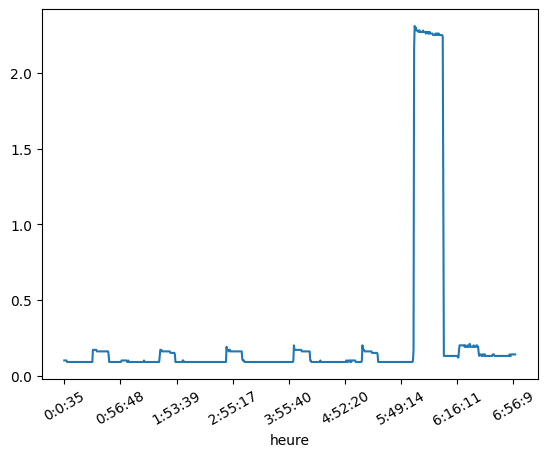

In [428]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [429]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:33:19.284791,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:33:41.142791,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:34:03.143791,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:34:25.071791,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:34:46.962791,21/08/23
...,...,...,...,...,...,...,...
1511405,26185,0.14,26.185,137.483292,37455766691,2024-10-28 06:55:44.041791,28/10/24
1511406,25803,0.14,25.803,139.518661,37455792494,2024-10-28 06:56:09.844791,28/10/24
1511407,26110,0.14,26.110,137.878208,37455818604,2024-10-28 06:56:35.954791,28/10/24
1511408,26260,0.14,26.260,137.090632,37455844864,2024-10-28 06:57:02.214791,28/10/24


In [430]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:35,36576,0.10,36.576,98.425197,37430858372,2024-10-28 00:00:35.722791,28/10/24
0:1:11,36246,0.10,36.246,99.321304,37430894618,2024-10-28 00:01:11.968791,28/10/24
0:1:48,36636,0.10,36.636,98.264003,37430931254,2024-10-28 00:01:48.604791,28/10/24
0:2:25,36703,0.10,36.703,98.084625,37430967957,2024-10-28 00:02:25.307791,28/10/24
0:3:2,36794,0.10,36.794,97.842039,37431004751,2024-10-28 00:03:02.101791,28/10/24
...,...,...,...,...,...,...,...
6:55:44,26185,0.14,26.185,137.483292,37455766691,2024-10-28 06:55:44.041791,28/10/24
6:56:9,25803,0.14,25.803,139.518661,37455792494,2024-10-28 06:56:09.844791,28/10/24
6:56:35,26110,0.14,26.110,137.878208,37455818604,2024-10-28 06:56:35.954791,28/10/24


In [431]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/10/24 4.002
Min : 29/09/24 1.785


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1510606,36576,0.10,36.576,98.425197,37430858372,2024-10-28 00:00:35.722791,28/10/24,0:0:35
1510607,36246,0.10,36.246,99.321304,37430894618,2024-10-28 00:01:11.968791,28/10/24,0:1:11
1510608,36636,0.10,36.636,98.264003,37430931254,2024-10-28 00:01:48.604791,28/10/24,0:1:48
1510609,36703,0.10,36.703,98.084625,37430967957,2024-10-28 00:02:25.307791,28/10/24,0:2:25
1510610,36794,0.10,36.794,97.842039,37431004751,2024-10-28 00:03:02.101791,28/10/24,0:3:2
...,...,...,...,...,...,...,...,...
1511405,26185,0.14,26.185,137.483292,37455766691,2024-10-28 06:55:44.041791,28/10/24,6:55:44
1511406,25803,0.14,25.803,139.518661,37455792494,2024-10-28 06:56:09.844791,28/10/24,6:56:9
1511407,26110,0.14,26.110,137.878208,37455818604,2024-10-28 06:56:35.954791,28/10/24,6:56:35
1511408,26260,0.14,26.260,137.090632,37455844864,2024-10-28 06:57:02.214791,28/10/24,6:57:2


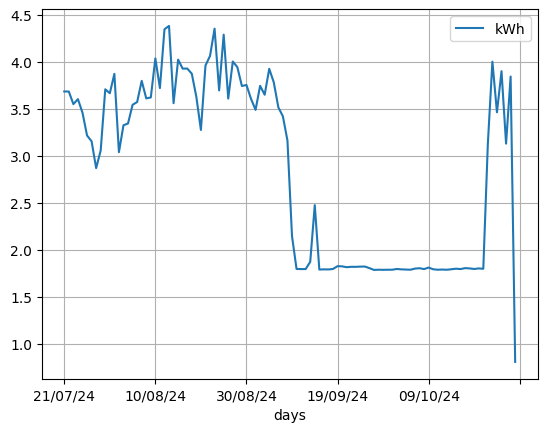

In [432]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-10-28 00:00:35.722791	2024-10-28 06:57:27.899791	6h 56m 52s 	804
<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 1510606 to 1511409
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   804 non-null    int64         
 1   kWh        804 non-null    float64       
 2   sec        804 non-null    float64       
 3   Wh         804 non-null    float64       
 4   cumul(ms)  804 non-null    int64         
 5   dates      804 non-null    datetime64[ns]
 6   days       804 non-null    object        
 7   heure      804 non-null    object        
 8   hours      804 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 62.8+ KB


('28/10/24', <Axes: xlabel='hours'>)

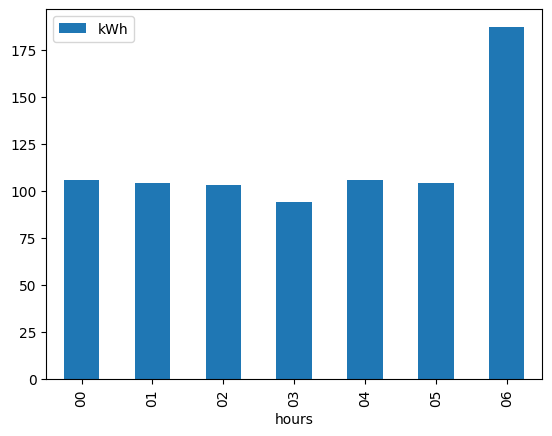

In [433]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [434]:
df_grp

,kWh
days,
21/08/23,0.913
22/08/23,3.699
23/08/23,4.215
24/08/23,3.703
25/08/23,4.215
...,...
24/10/24,3.463
25/10/24,3.901
26/10/24,3.129


In [435]:
# select number of days to display
span = 30
#df_grp.tail(span)


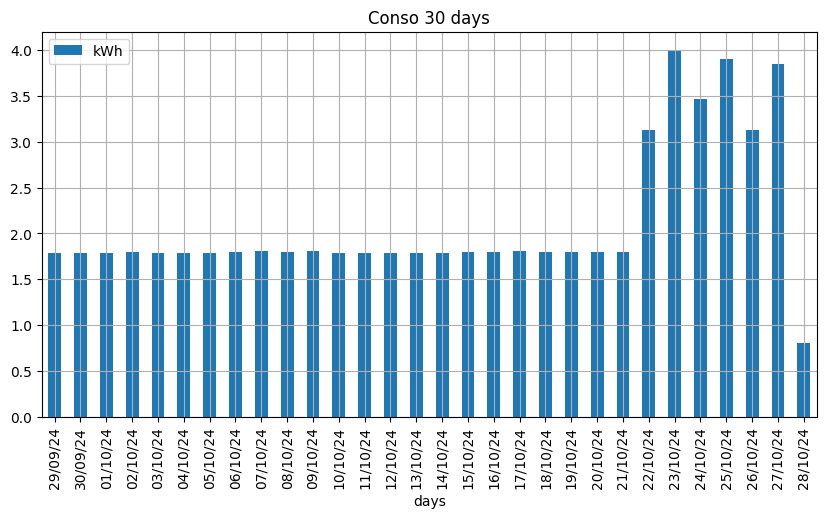

In [436]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


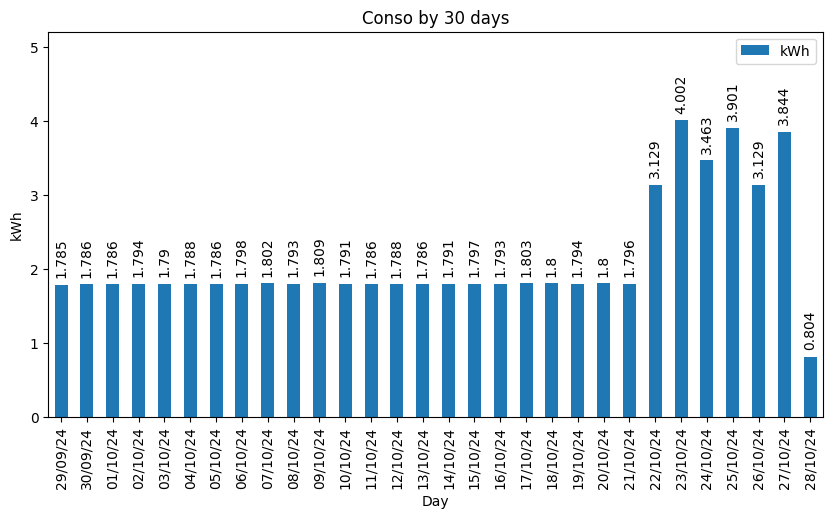

In [437]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [438]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
29/09/24    1.785
30/09/24    1.786
01/10/24    1.786
02/10/24    1.794
03/10/24    1.790
04/10/24    1.788
05/10/24    1.786
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.786
12/10/24    1.788
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.129
23/10/24    4.002
24/10/24    3.463
25/10/24    3.901
26/10/24    3.129
27/10/24    3.844
28/10/24    0.804
Name: kWh, dtype: float64

In [439]:
x_labels=df_grp.tail(span).index
x_labels

Index(['29/09/24', '30/09/24', '01/10/24', '02/10/24', '03/10/24', '04/10/24',
       '05/10/24', '06/10/24', '07/10/24', '08/10/24', '09/10/24', '10/10/24',
       '11/10/24', '12/10/24', '13/10/24', '14/10/24', '15/10/24', '16/10/24',
       '17/10/24', '18/10/24', '19/10/24', '20/10/24', '21/10/24', '22/10/24',
       '23/10/24', '24/10/24', '25/10/24', '26/10/24', '27/10/24', '28/10/24'],
      dtype='object', name='days')

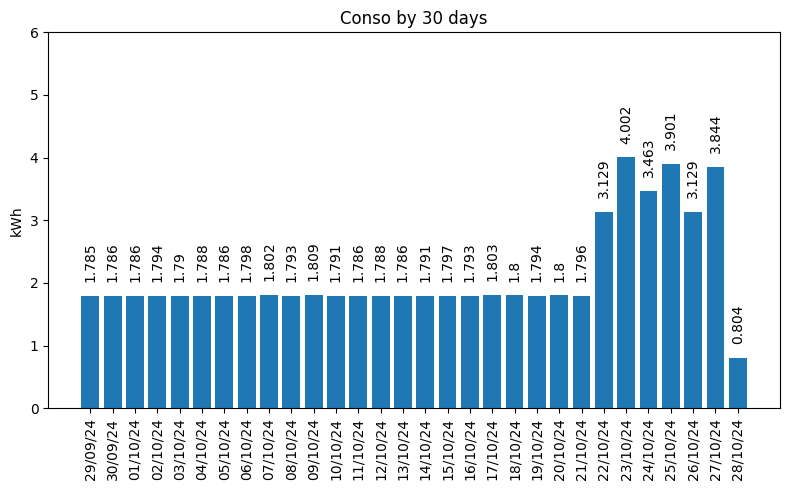

In [440]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [441]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

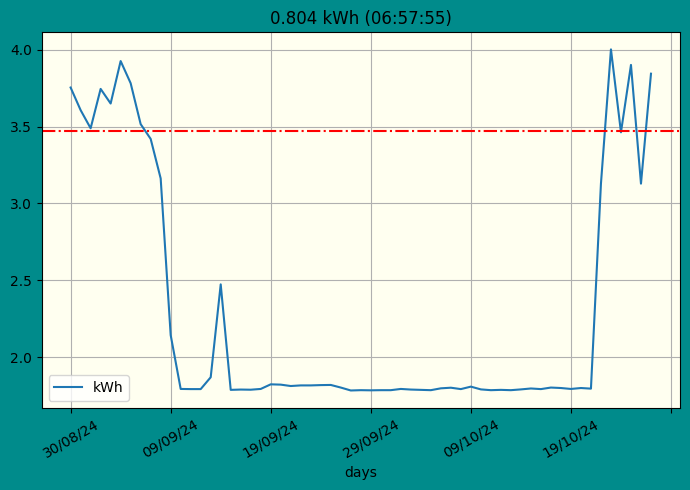

In [442]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

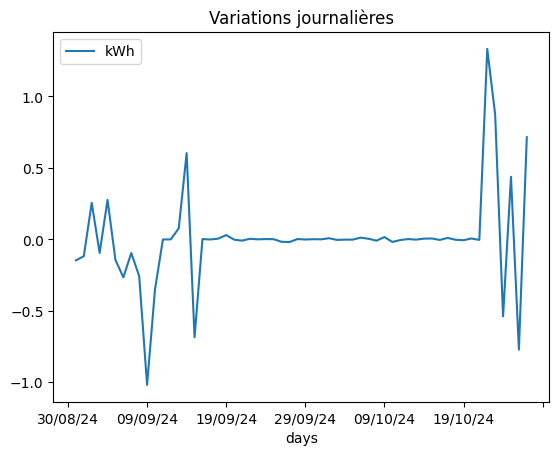

In [443]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [444]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:33:19.284791,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:33:41.142791,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:34:03.143791,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:34:25.071791,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:34:46.962791,21/08/23,18
...,...,...,...,...,...,...,...,...
1511405,26185,0.14,26.185,137.483292,37455766691,2024-10-28 06:55:44.041791,28/10/24,06
1511406,25803,0.14,25.803,139.518661,37455792494,2024-10-28 06:56:09.844791,28/10/24,06
1511407,26110,0.14,26.110,137.878208,37455818604,2024-10-28 06:56:35.954791,28/10/24,06
1511408,26260,0.14,26.260,137.090632,37455844864,2024-10-28 06:57:02.214791,28/10/24,06


In [445]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [446]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [447]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [448]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,913
22/08/23,3699
23/08/23,4215
24/08/23,3703
25/08/23,4215
...,...
24/10/24,3463
25/10/24,3901
26/10/24,3129


In [450]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:33:19.284791,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:33:41.142791,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:34:03.143791,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:34:25.071791,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:34:46.962791,21/08/23,18
...,...,...,...,...,...,...,...,...
1511405,26185,0.14,26.185,137.483292,37455766691,2024-10-28 06:55:44.041791,28/10/24,06
1511406,25803,0.14,25.803,139.518661,37455792494,2024-10-28 06:56:09.844791,28/10/24,06
1511407,26110,0.14,26.110,137.878208,37455818604,2024-10-28 06:56:35.954791,28/10/24,06
1511408,26260,0.14,26.260,137.090632,37455844864,2024-10-28 06:57:02.214791,28/10/24,06


In [451]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
28/10/24 06    1511405  28/10/24    06  0.14
               1511406  28/10/24    06  0.14
               1511407  28/10/24    06  0.14
               1511408  28/10/24    06  0.14
               1511409  28/10/24    06  0.14

[1511410 rows x 3 columns]

In [452]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [453]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [454]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,913,913
22/08/23,3699,3699
23/08/23,4215,4215
24/08/23,3703,3703
25/08/23,4215,4215
...,...,...
24/10/24,3463,3463
25/10/24,3901,3901
26/10/24,3129,3129


In [455]:
grp_by_day['kWh'].cumsum()

days
21/08/23        913
22/08/23       4612
23/08/23       8827
24/08/23      12530
25/08/23      16745
             ...   
24/10/24    1499732
25/10/24    1503633
26/10/24    1506762
27/10/24    1510606
28/10/24    1511410
Name: kWh, Length: 435, dtype: int64

In [456]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      78
         19     282
         20     156
         21     133
         22     132
...             ...
28/10/24 02     103
         03      94
         04     106
         05     104
         06     187

[10405 rows x 1 columns]

In [457]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            78
          19           360
          20           516
          21           649
          22           781
                    ...   
28/10/24  02       1510919
          03       1511013
          04       1511119
          05       1511223
          06       1511410
Name: kWh, Length: 10405, dtype: int64

In [458]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      78      78    NaN
         19     282     360  204.0
         20     156     516 -126.0
         21     133     649  -23.0
         22     132     781   -1.0
...             ...     ...    ...
28/10/24 02     103     313   -1.0
         03      94     407   -9.0
         04     106     513   12.0
         05     104     617   -2.0
         06     187     804   83.0

[10405 rows x 3 columns]

In [459]:
today, grp_by_dayhours.loc[today]

('28/10/24',
        kWh  cumsum  diff
 hours                   
 00     106     106   NaN
 01     104     210  -2.0
 02     103     313  -1.0
 03      94     407  -9.0
 04     106     513  12.0
 05     104     617  -2.0
 06     187     804  83.0)

Text(0.5, 1.0, 'Cumul journalier')

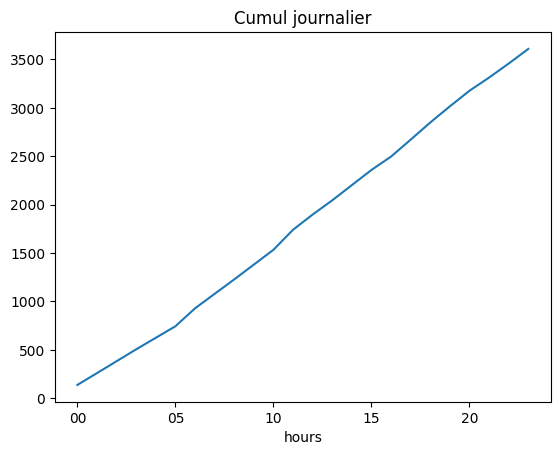

In [460]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

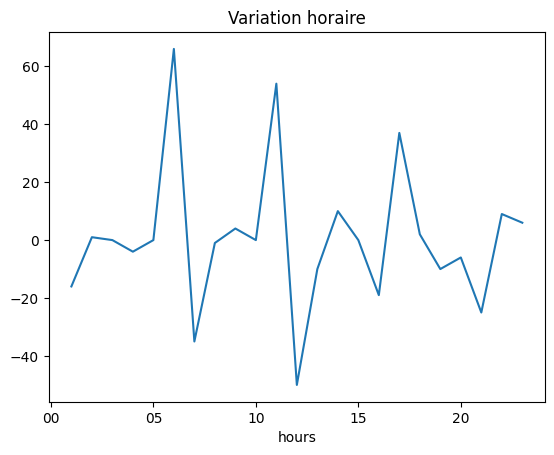

In [461]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [462]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

435

Text(0.5, 1.0, '435 days')

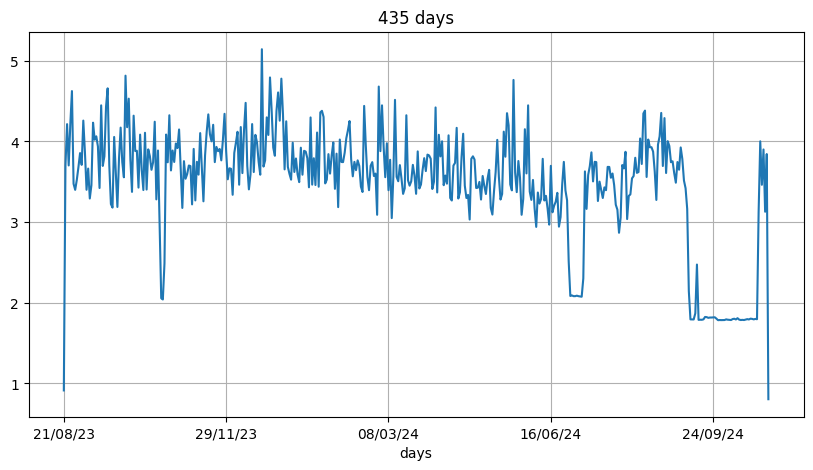

In [463]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

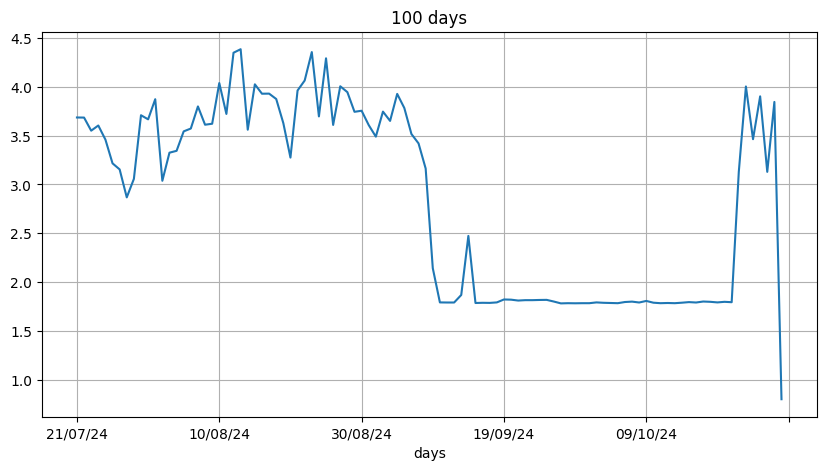

In [464]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [465]:
df_grp.tail(span)['kWh']

days
21/07/24    3.685
22/07/24    3.684
23/07/24    3.550
24/07/24    3.603
25/07/24    3.459
            ...  
24/10/24    3.463
25/10/24    3.901
26/10/24    3.129
27/10/24    3.844
28/10/24    0.804
Name: kWh, Length: 100, dtype: float64

In [466]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,106,106,NaN
01,104,210,-2.0
02,103,313,-1.0
03,94,407,-9.0
04,106,513,12.0
05,104,617,-2.0
06,187,804,83.0


In [467]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


7

In [468]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 8)

In [469]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [470]:
grp_by_dayhours.loc[day,'days'].values

array([1., 2., 3., 4., 5., 6., 7.])

In [471]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
Name: days, dtype: float64

In [472]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [473]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 00 to 06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     7 non-null      int64  
 1   cumsum  7 non-null      int64  
 2   diff    6 non-null      float64
 3   days    7 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 280.0+ bytes


In [474]:
grp_by_dayhours.loc[day,'days']

hours
00    1.0
01    2.0
02    3.0
03    4.0
04    5.0
05    6.0
06    7.0
Name: days, dtype: float64

In [475]:
day

'28/10/24'

In [476]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,106,106,NaN,1.0
01,104,210,-2.0,2.0
02,103,313,-1.0,3.0
03,94,407,-9.0,4.0
04,106,513,12.0,5.0
05,104,617,-2.0,6.0
06,187,804,83.0,7.0


Text(0.5, 1.0, '28/10/24')

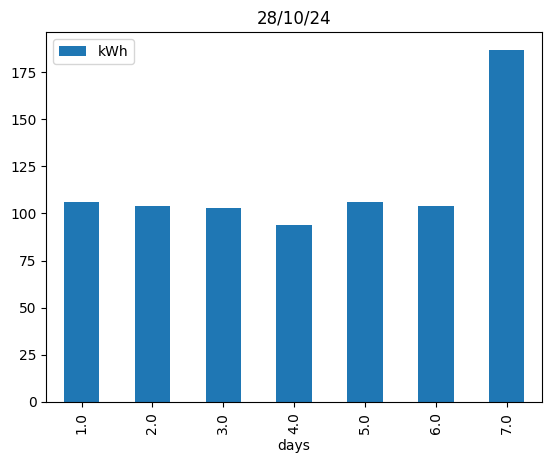

In [477]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [478]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06'], dtype='object', name='hours')

# Conso du jour


In [479]:
groupedbyhour.count()

,kWh
hours,
00,106
01,104
02,103
03,94
04,106
05,104
06,187


In [480]:
day = '13/09/24'
#day = today
grp_by_dayhours.loc[day].kWh

hours
00     77
01     77
02     77
03     77
04     76
05     76
06     76
07     74
08     72
09     73
10     73
11     74
12     72
13     74
14     72
15     75
16     73
17     73
18     73
19     76
20     76
21     91
22    106
23    107
Name: kWh, dtype: int64

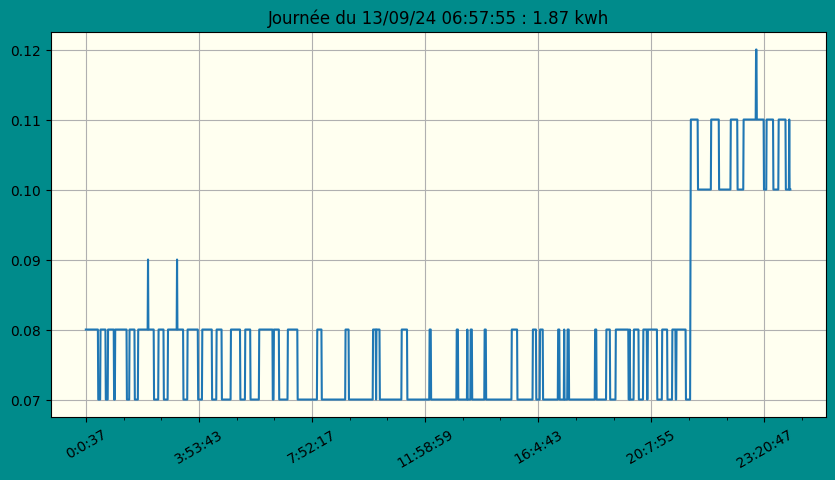

In [481]:
show('13/09/24',bgcolor='ivory')

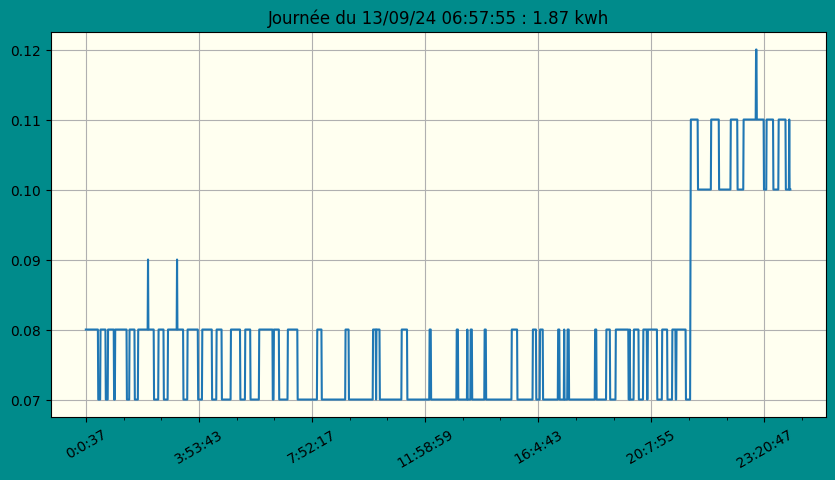

In [482]:
show(day,bgcolor='ivory')

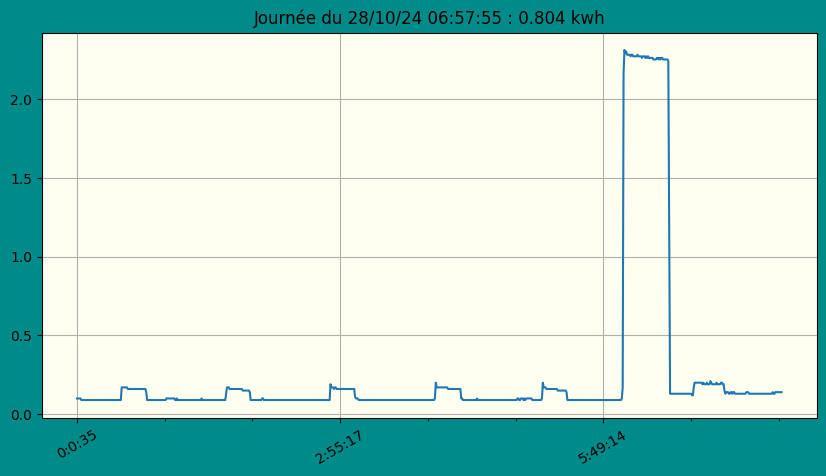

In [483]:
# retour vietnam 22/10/2024
show(today,bgcolor='ivory')

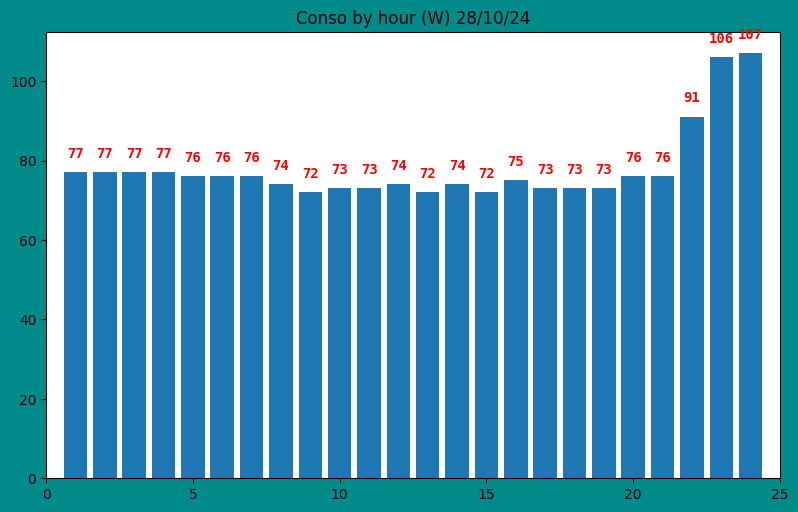

In [484]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [485]:
diff = grp_by_dayhours.loc[day]
diff


,kWh,cumsum,diff,days
hours,,,,
00,77,77,NaN,NaN
01,77,154,0.0,NaN
02,77,231,0.0,NaN
03,77,308,0.0,NaN
04,76,384,-1.0,NaN
05,76,460,0.0,NaN
06,76,536,0.0,NaN
07,74,610,-2.0,NaN
08,72,682,-2.0,NaN


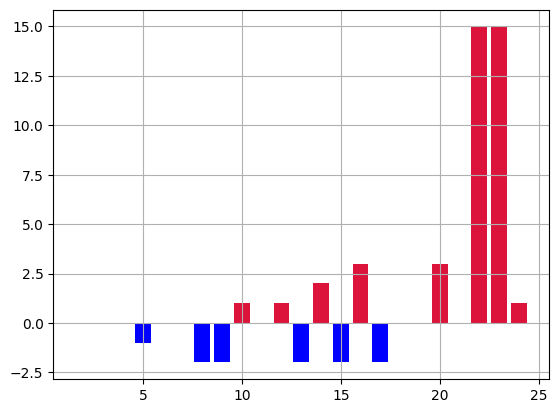

In [486]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

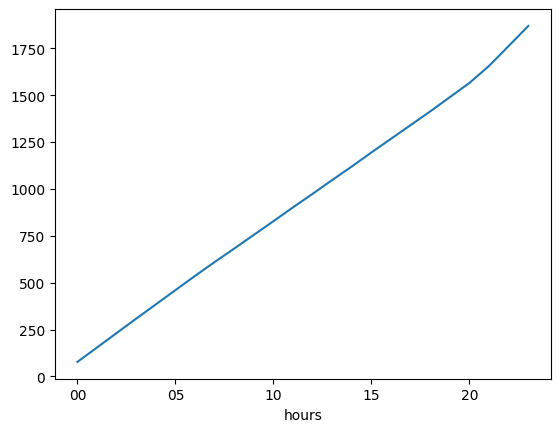

In [487]:
data.cumsum().plot()


<Axes: xlabel='hours'>

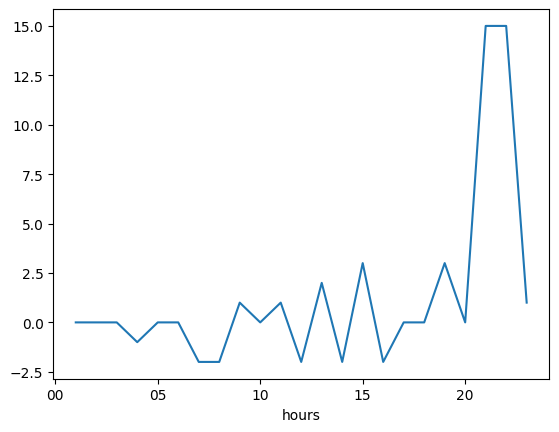

In [488]:
data.diff().plot()

# Test

In [489]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_data_with_dates.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp1612

In [490]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_data_with_dates.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [491]:
#conso_byhour(day)

In [492]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

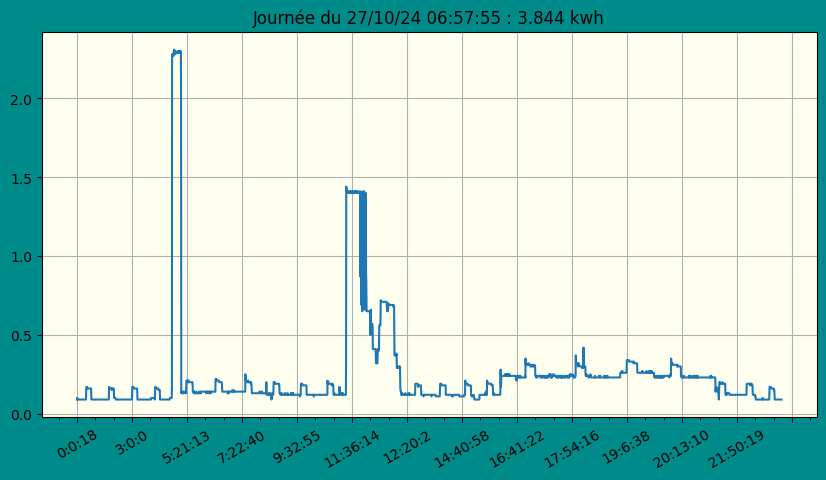

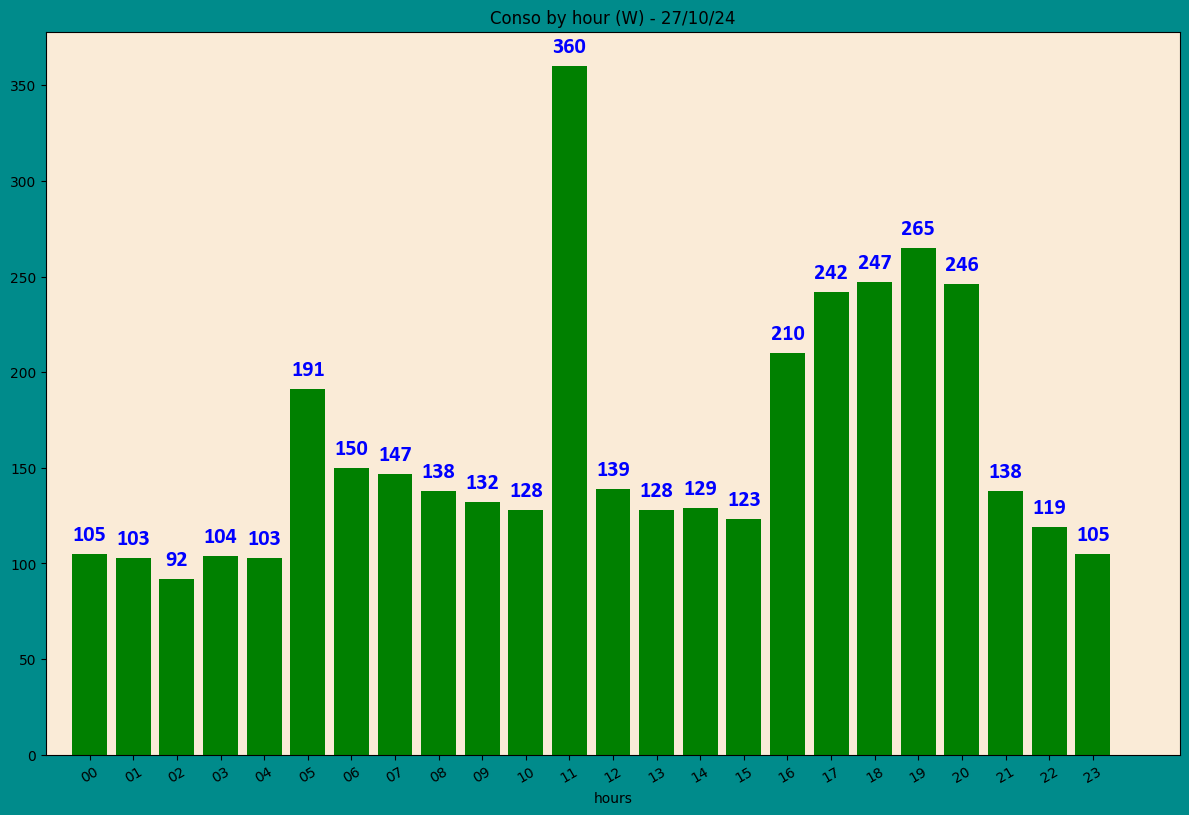

In [493]:
# plot any day
day = '27/10/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

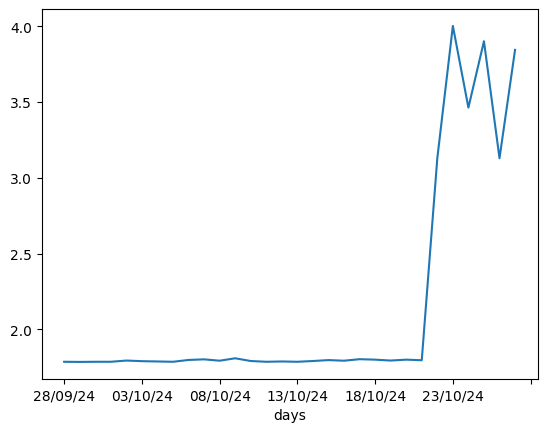

In [494]:
month.plot()


In [495]:
month

days
28/09/24    1.786
29/09/24    1.785
30/09/24    1.786
01/10/24    1.786
02/10/24    1.794
03/10/24    1.790
04/10/24    1.788
05/10/24    1.786
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.786
12/10/24    1.788
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.129
23/10/24    4.002
24/10/24    3.463
25/10/24    3.901
26/10/24    3.129
27/10/24    3.844
Name: kWh, dtype: float64

In [496]:
month

days
28/09/24    1.786
29/09/24    1.785
30/09/24    1.786
01/10/24    1.786
02/10/24    1.794
03/10/24    1.790
04/10/24    1.788
05/10/24    1.786
06/10/24    1.798
07/10/24    1.802
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.786
12/10/24    1.788
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.129
23/10/24    4.002
24/10/24    3.463
25/10/24    3.901
26/10/24    3.129
27/10/24    3.844
Name: kWh, dtype: float64

In [497]:
# date with max conso in 1 month
month.idxmax()

'23/10/24'

In [498]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/10/24'

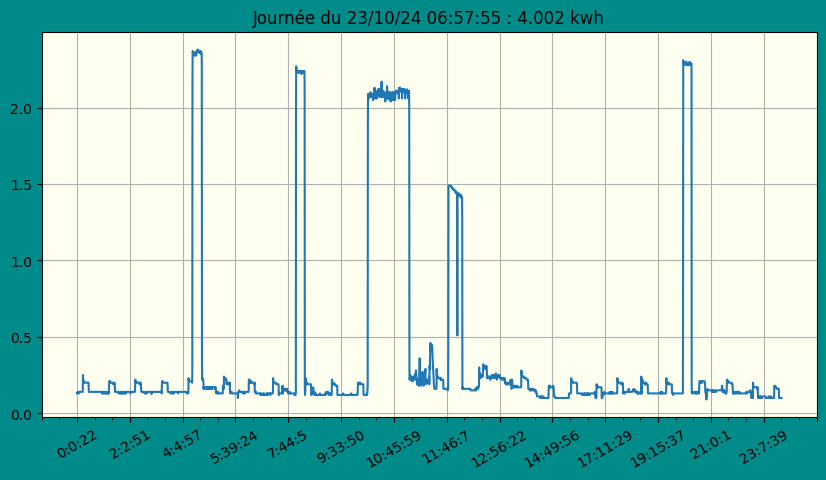

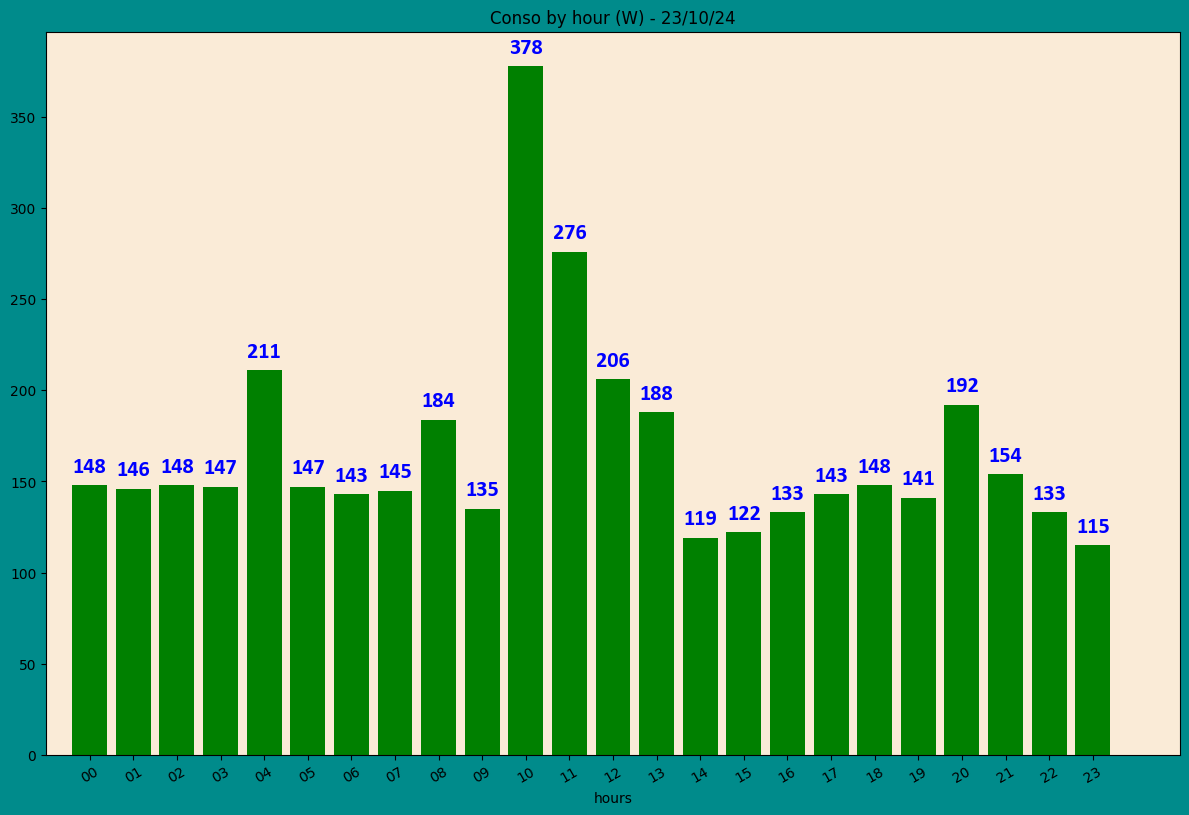

In [499]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [500]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,148,148,NaN,NaN
01,146,294,-2.0,NaN
02,148,442,2.0,NaN
03,147,589,-1.0,NaN
04,211,800,64.0,NaN
05,147,947,-64.0,NaN
06,143,1090,-4.0,NaN
07,145,1235,2.0,NaN
08,184,1419,39.0,NaN


In [501]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

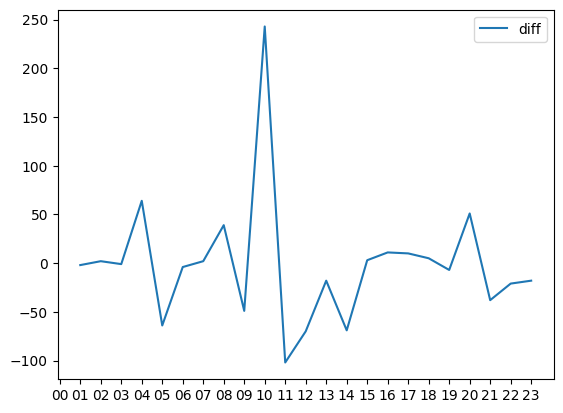

In [502]:
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

In [503]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)